**Machine Learning Basic Principles 2018 - Data Analysis Project Report**

# *Classifying music with logistic regression* 

## Abstract

    We implemented a classifier that uses Logistic Regression to classify samples given in specific format. We also tried to use other methods (Random forests, K-nearest neighbours, gaussian naive bayes), but those did not work as well according to our tests.



## 1. Introduction

The given goal was to classify music based on pre-processed features to 10 different categories. We hoped to learn how to use libraries to do similar classification that had been done earlier on the course.

Methods we learned might be useful for building recommendation engines and general knowledge about classifiers is useful when building classifiers.

If you want to run this locally, you need to install dependencies. We have not tested them on your machine, so your mileage may vary. Requirements are included in dependencies.yml. You might have to change the file a bit (there is a path pointing to a home folder, your home will probably not be the same one).

## 2. Data analysis

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.model_selection import cross_val_score



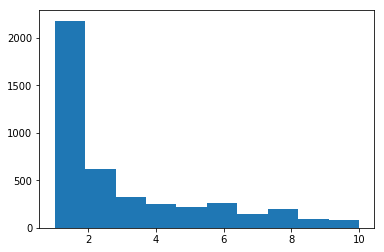

Most training data seems to be in the class 1 (Pop_Rock)


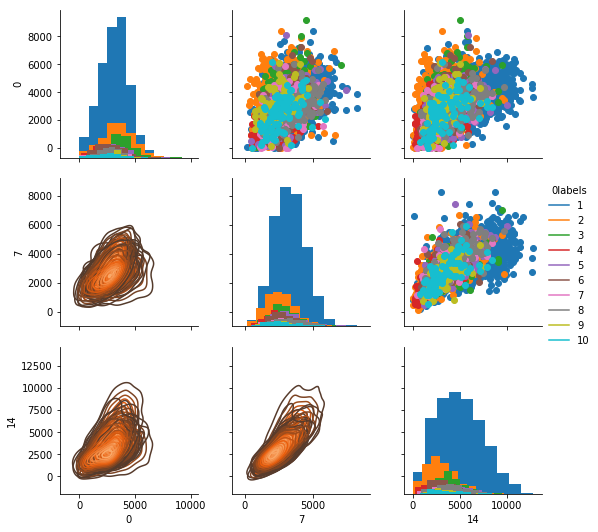

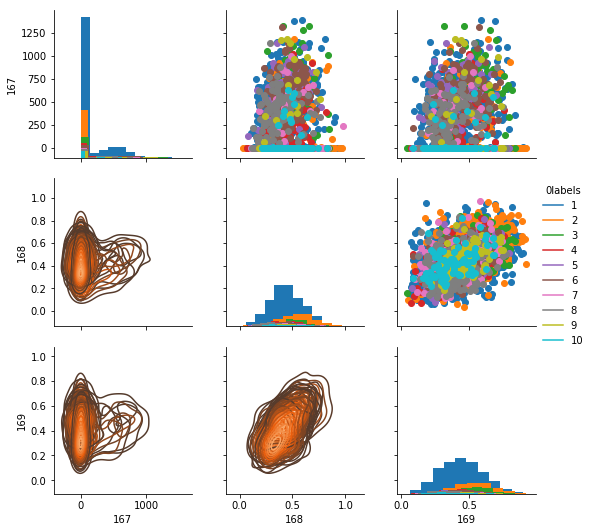

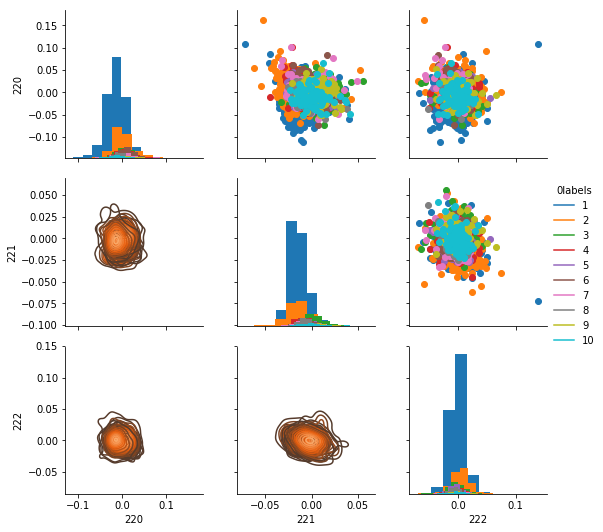

There are clearly visible differences between classes --> classification is possible


In [2]:
# Load the data
X = pd.read_csv("train_data.csv", header=None).values
X_pd = pd.read_csv("train_data.csv", header=None)
y = pd.read_csv("train_labels.csv", header=None).values
y_pd = pd.read_csv("train_labels.csv", header=None)
X_t = pd.read_csv("test_data.csv", header=None).values

X = StandardScaler().fit_transform(X)
y = y.ravel()

X_t = StandardScaler().fit_transform(X_t)

# Setup training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.4, random_state=0)

#print("X: %s" % X.shape.__str__())
#print("y: %s" % y.shape.__str__())
#print("X_t: %s" % X_t.shape.__str__())

def labels_for_class_k(k):
    """Returns the array of labels so that label = 1 if y_i == k for each element y_i in y"""
    return (y == k).astype(np.int)

# Labels
lable_tuples = [(1, 'Pop_Rock'), (2, 'Electronic'), (3, 'Rap'), (4, 'Jazz'), (5, 'Latin'), (6, 'RnB'), 
                (7, 'International'), (8, 'Country'), (9, 'Reggae'), (10, 'Blues')]

# Visualize labels of training data:
X_pd_labels = X_pd.join(y_pd, rsuffix="labels")
#print(X_pd_labels)
#print(X_pd_labels.columns)
plt.hist(y)
plt.show()
print("Most training data seems to be in the class 1 (Pop_Rock)")

# More visualization, lets take few features from each meta-dimension (Rhythm, Chroma, MFCC) 
g = sns.PairGrid(X_pd_labels, vars=["0", 7, 14], hue='0labels')
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Oranges_d")
g.add_legend()
plt.show()

g = sns.PairGrid(X_pd_labels, vars=[167, 168, 169], hue='0labels')
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Oranges_d")
g.add_legend()
plt.show()

g = sns.PairGrid(X_pd_labels, vars=[220, 221, 222] , hue='0labels')
g.map_diag(plt.hist)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot, cmap="Oranges_d")
g.add_legend()
plt.show()

print("There are clearly visible differences between classes --> classification is possible")

## 3. Methods and experiments

We found this [list of classifiers from sckit-learn](http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) and tested few interesting ones. But as none of the more interesting classifiers seemed to be a lot more accurate in our simple tests, we choose to proceed with Logistic regression.

We evaluated our solution by submitting it to kaggle. Before that we tested it with the sci-kit learn build-in score functions.


In [30]:
# Trials with ML algorithms

# Test Logistic regression
LR = LogisticRegression(solver="saga",
                        multi_class="ovr",
                        C=1, 
                        penalty='l1', 
                        fit_intercept=True,
                        max_iter=5,
                        random_state=42
                        )

LR.fit(X_train, y_train)

print("LR score: %f.2" % LR.score(X_test, y_test))
print("LR logloss score %f.2" % metrics.log_loss(y_test, LR.predict_proba(X_test)))


# Test Random forest classifier
clf = RandomForestClassifier(n_estimators=1000, max_depth=3,
                             random_state=0)
clf.fit(X_train, y_train)
print("RF score %f.2" % clf.score(X_test, y_test))
print("RF logloss score %f.2" % metrics.log_loss(y_test, clf.predict_proba(X_test)))


# Test K-nearest neigbors classifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

print("KNN score %f.2" % knn.score(X_test, y_test))
print("KNN logloss score %f.2" % metrics.log_loss(y_test, knn.predict_proba(X_test)))


# Test Gaussian naive bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

print("GNB score %f.2" % gnb.score(X_test, y_test))
print("GNB logloss score %f.2" % metrics.log_loss(y_test, gnb.predict_proba(X_test)))



def write_accuracy_solution_csv(rs, name):
    idx = range(1, rs.shape[0]+1)
    data = np.stack((idx, rs), axis=-1)
    cols = ['Sample_id', 'Sample_label']
    df = pd.DataFrame(data=data, columns=cols)
    df.to_csv("accuracy_solution_{}.csv".format(name), index=False)
    

def write_logloss_solution_csv(rs, name): 
    idx = range(1, rs.shape[0]+1)
    data = np.column_stack((idx, rs))
    columns = ["Sample_id"] + ["Class_%d" % i for i in range(1, rs.shape[1]+1)]
    df = pd.DataFrame(data=data, columns=columns)
    # Convert sample id column to integer
    df.loc[:, "Sample_id"] = df["Sample_id"].apply(int)
    
    df.to_csv("logloss_solution_{}.csv".format(name), index=False)


    
# Train the model with whole test set 
LR_prod = LogisticRegression(solver="saga",
                        multi_class="ovr",
                        C=1, 
                        penalty='l1', 
                        fit_intercept=True,
                        max_iter=5,
                        random_state=42
                        )

LR_prod.fit(X,y)

print("LR prod score: %f.2" % LR_prod.score(X, y))
print("LR prod logloss score %f.2" % metrics.log_loss(y, LR_prod.predict_proba(X)))


# Run model on test dataset
results_clf = clf.predict(X_t)
prob_results_clf = clf.predict_proba(X_t)

results_lr = LR_prod.predict(X_t)
prob_results_lr = LR_prod.predict_proba(X_t)


write_accuracy_solution_csv(results_lr, "lr")
write_logloss_solution_csv(prob_results_lr, "lr")


write_accuracy_solution_csv(results_clf, "clf")
write_logloss_solution_csv(prob_results_clf, "clf")


/home/user/TKK/CS-E3210-MLBP/music-classifier-3000/.venv/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/TKK/CS-E3210-MLBP/music-classifier-3000/.venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LR score: 0.506300.2
LR logloss score 1.663869.2


/home/user/TKK/CS-E3210-MLBP/music-classifier-3000/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:22: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RF score 0.541237.2
RF logloss score 1.450323.2


/home/user/TKK/CS-E3210-MLBP/music-classifier-3000/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:29: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNN score 0.553265.2
KNN logloss score 6.370239.2
GNB score 0.329897.2
GNB logloss score 17.247751.2


/home/user/TKK/CS-E3210-MLBP/music-classifier-3000/.venv/lib/python3.6/site-packages/sklearn/utils/validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/user/TKK/CS-E3210-MLBP/music-classifier-3000/.venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LR prod score: 0.673619.2
LR prod logloss score 1.514166.2


## 4. Results

We tested 4 different classifiers really cursively and found out that with our data and our hyperparameters the K-nearest neighbors (with 10 neighbors) performs best when measured with plain prediction accuracy. When measured with logloss, random forests performed best.

We still ended up using Logistic regression, as it seemed to perform better on kaggle submissions.

We submitted our results to Kaggle and results we better than the minimun requirements so we are satisfied. Compared to our test results the Kaggle results were comparable with Logistic Regression. We also tried submitting the Random Forests results, but those were worse than with LR.

We also ran cross validation with the model we selected to see how much it differs with different subsplits. Looks like splitting has some effect, but it is not dramatic.

We plotted confusion matrix to check which classes are confused to which classes most often. To my eye it looks like the confusion matrix seems to follow the probability of a class. So most common classes get confused to other common classes. And with the less common classes our modle performs abysmally (no correct predictions for class 10 on the matrix for example).

/home/user/TKK/CS-E3210-MLBP/music-classifier-3000/.venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/TKK/CS-E3210-MLBP/music-classifier-3000/.venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/TKK/CS-E3210-MLBP/music-classifier-3000/.venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/home/user/TKK/CS-E3210-MLBP/music-classifier-3000/.venv/lib/python3.6/site-packages/sklearn/linear_model/sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", Conv

CV scores  [0.64880274 0.66018307 0.62657503 0.64137931 0.64556962]


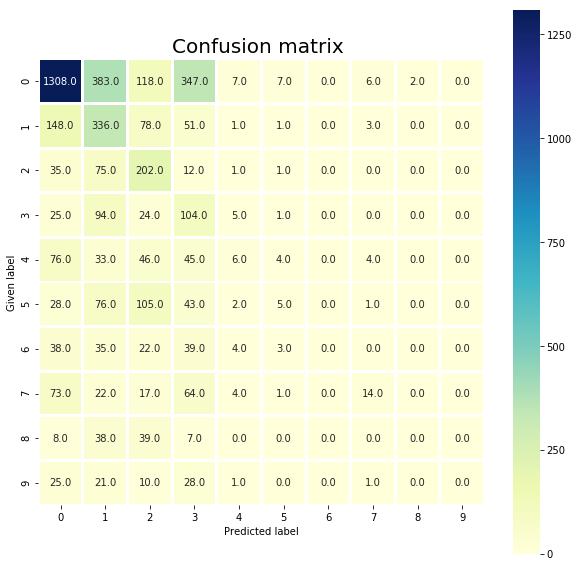

In [24]:
lr_preds = LR.predict(X)

#Confusion matrix 
confmat = metrics.confusion_matrix(y, lr_preds)
plt.figure(figsize=(10,10))
sns.heatmap(confmat, annot=True, fmt=".1f", linewidths=2, square = True, cmap="YlGnBu");
plt.ylabel('Given label');
plt.xlabel('Predicted label');
plt.title("Confusion matrix ", size=20);

# Cross validation
scores = cross_val_score(LR, X, y, cv=5)
print("CV scores ", scores)


## 5. Discussion/Conclusions

This was pretty interesting. In the end the logistic regression ended up being most robust for us. This is probably mostly because we did not have a lot of time to experiment around with the hyperparameters.

Accuracy and logloss seem pretty good measures, but as our confusion matrics illustrates, less-common classes can get suppressed because more than one would think (~60% accuracy, but still no correct predictions for smaller classes). So clearly accuracy can be misleading. Logloss might be a better metric, but I did not have time to compare it

This was quite an interesting experiment. Thank you!


## 6. References

We used the documentation of scikit-learn a lot. 
http://scikit-learn.org/stable/documentation.html